Reference:https://www.cs.toronto.edu/~kriz/cifar.html<br>
深度學習攻略手冊

In [1]:
# 載入資料集套件並下載資料集
# from tensorflow.keras.datasets import cifar10
from keras.datasets import cifar10

# tuple                     tuple
# (training x, training y), (testing x, testing y)

# Features, Labels
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# cifar-10-batches-py.tar

In [2]:
# 查看資料(特徵向量X)的shape
print("X_train shape", X_train)
print("X_train shape", X_test)

#  筆數，圖片的大小:32 * 32 ，色彩的channel(RGB: 3，Gray: 1，具透明度: 4)

X_train shape [[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  5

In [3]:
# 查看標籤(目標y)的shape
print("y_train shape", y_train)
print("y_train shape", y_test)

y_train shape [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
y_train shape [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [4]:
# 查看標籤內容
print(X_train[0])

#    2**8次方，顏色介於0-256

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


### Q: 正規化(Normalization) v.s. 標準化(Standardization)

正規化不會改變資料分布，只是縮小維度

In [5]:
# 進行min-max normalization
# 將資料等比例縮放於[0, 1]區間，且不改變分布，讓資料基準相同
# x' = x - min(x) / max(x) - min(x)
#            0       255      0  色階介於0-255

# 正規化前
print(X_train[0][0][0])

[59 62 63]


In [6]:
# 正規化後
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255
print(X_train_norm[0][0][0])

[0.23137255 0.24313726 0.24705882]


In [7]:
# 將數字標籤轉為one-hot encoding
# 類別標籤是用0-9表示
from keras import utils

# 轉換前
print(y_train[0])

[6]


In [8]:
# 轉換後
#                                   原標籤資料，類別的數量
y_train_onehot = utils.to_categorical(y_train, 10)
y_test_onehot = utils.to_categorical(y_test, 10)
print(y_train_onehot[0]) # index = 6 的地方會是 1

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 上面已完成資料預處理

In [9]:
# 建立CNN神經網路架構
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [10]:
# 建立神經網路
cnn_network = Sequential()

# 疊加Layer
# 卷積層
cnn_network.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (32, 32, 3)))
# 避免overfitting 把dropout加進去
# cnn_network.add(Dropout(0.1))
# 池化層
cnn_network.add(MaxPooling2D(2, 2))
# 卷積層
cnn_network.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# cnn_network.add(Dropout(0.1))
# 池化層
cnn_network.add(MaxPooling2D(2, 2))
# 展平層
cnn_network.add(Flatten())
# 密集層
cnn_network.add(Dense(1024, activation='relu'))
# 密集層-輸出
cnn_network.add(Dense(10, activation='softmax'))
# 網路摘要
cnn_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 1024)              4

keras optimizer 說明
https://keras.io/zh/optimizers/

In [11]:
# 神經網路的訓練配置
cnn_network.compile(loss = 'categorical_crossentropy', 
                    optimizer='adam',
                    metrics=['acc'])  # 評量模型的準則


In [12]:
# 進行訓練
history = cnn_network.fit(x = X_train_norm,     # 訓練樣本
                          y = y_train_onehot,   # 訓練標籤
                          batch_size = 128,     # 每個批次多少筆資料進行訓練
                          epochs=20,            # 20個訓練週期
                          validation_split=0.1  # 拆出10%的training data作為驗證資料
                          )

Epoch 1/20
352/352 [==============================] - 47s 133ms/step - loss: 1.4633 - acc: 0.4778 - val_loss: 1.1374 - val_acc: 0.5968
Epoch 2/20
352/352 [==============================] - 44s 125ms/step - loss: 1.0427 - acc: 0.6350 - val_loss: 0.9869 - val_acc: 0.6662
Epoch 3/20
352/352 [==============================] - 43s 122ms/step - loss: 0.8838 - acc: 0.6895 - val_loss: 0.9058 - val_acc: 0.6916
Epoch 4/20
352/352 [==============================] - 40s 115ms/step - loss: 0.7621 - acc: 0.7336 - val_loss: 0.8405 - val_acc: 0.7082
Epoch 5/20
352/352 [==============================] - 38s 109ms/step - loss: 0.6501 - acc: 0.7739 - val_loss: 0.8253 - val_acc: 0.7142
Epoch 6/20
352/352 [==============================] - 38s 107ms/step - loss: 0.5396 - acc: 0.8138 - val_loss: 0.8132 - val_acc: 0.7358
Epoch 7/20
352/352 [==============================] - 39s 110ms/step - loss: 0.4426 - acc: 0.8473 - val_loss: 0.9445 - val_acc: 0.6986
Epoch 8/20
352/352 [==============================] - 3

訓練過程中loss一直下降，acc一直上升，表示模型還OK
相反可能是overfitting

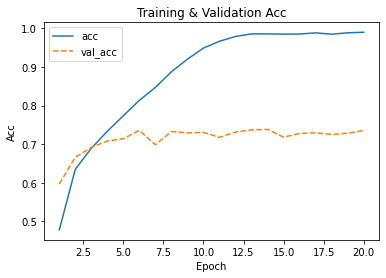

In [13]:
# 繪製損失及準確率
import util3 as u

u.plot(history.history,    # 準確率與驗證準確率的歷史線圖
       ('acc', 'val_acc'),
       ('Training & Validation Acc'),
       ('Epoch', 'Acc'),
       )

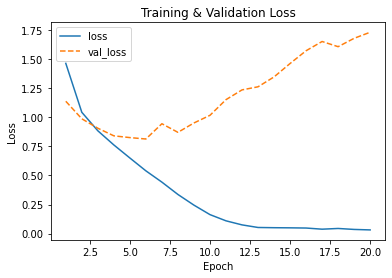

In [14]:
u.plot(history.history,    # 準確率與驗證準確率的歷史線圖
       ('loss', 'val_loss'),
       ('Training & Validation Loss'),
       ('Epoch', 'Loss'),
       )

大概7.5的位置已經overfitting，將dropout加進去，或是調整各層參數，找到一個更好的參數設置

In [15]:
# 儲存模型
cnn_network.save("cifar_cnn.h5")
# 神經網路的儲存都存成h5

# 儲存權重
# save_weights()

In [16]:
# 載入模型
from keras.models import load_model
old_cnn = load_model('cifar_cnn.h5')

In [17]:
# 測試資料評估模型
# evaluate(資料，標籤)
test_loss, test_acc = cnn_network.evaluate(X_test_norm, y_test_onehot)
print("Testing Loss: ", test_loss)
print("Testing Acc: ", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 1.8085 - acc: 0.7187
Testing Loss:  1.808456301689148
Testing Acc:  0.7186999917030334


In [18]:
# 查看預測結果
pred_prop = cnn_network.predict(X_test_norm)
print("第一筆測試資料的預測機率: ", pred_prop[0])
# 資料有10種類別
# 可知第一筆資料最有可能的類別為cat(index = 3)

313/313 [==============================] - 3s 10ms/step
第一筆測試資料的預測機率:  [4.3842985e-12 3.2156838e-06 3.3677793e-07 1.3596168e-01 7.7390003e-05
 2.8542656e-01 3.1979248e-04 1.1630094e-12 5.7821101e-01 5.3157815e-11]


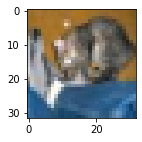

In [19]:
# 繪製測試資料
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(X_test[0])
plt.show()

In [20]:
print("第二筆測試資料的預測機率: ", pred_prop[1])
# 可知第二筆資料最有可能的類別為boat(index = 8)

第二筆測試資料的預測機率:  [6.3065925e-10 4.6802598e-01 3.5139150e-27 5.7645607e-21 4.6347529e-26
 9.4196525e-22 2.7382200e-17 5.1076864e-27 5.3197402e-01 3.6857076e-15]


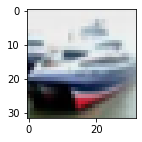

In [21]:
fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(X_test[1])
plt.show()

In [22]:
# 查看預測結果 - 數字標籤
import numpy as np
pred_class = np.argmax(cnn_network.predict(X_test_norm), axis=-1)

print("前十筆預測標籤: ", pred_class[0:10])
print("前十筆真實標籤: ", y_test[0:10].reshape(10))

313/313 [==============================] - 3s 10ms/step
前十筆預測標籤:  [8 8 0 0 6 6 1 6 3 1]
前十筆真實標籤:  [3 8 8 0 6 6 1 6 3 1]


In [23]:
print("第十筆測試資料的預測機率: ", pred_prop[9])

第十筆測試資料的預測機率:  [5.1023259e-14 9.6103418e-01 2.1924534e-18 1.1010753e-14 4.2795986e-19
 1.2837232e-13 4.0696752e-10 9.4482360e-20 3.3958497e-06 3.8962439e-02]


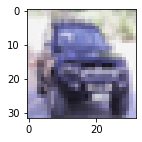

In [24]:
fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(X_test[9])
plt.show()

第十筆預測為卡車，實際為汽車

In [25]:
import tensorflow
tensorflow.__version__

'2.9.0'